In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, datasets
import torch.utils.data as tud
import torch.optim as optim 
import matplotlib.pyplot as plt

import imageio
import numpy as np

from torchvision.utils import make_grid, save_image
from tqdm import tqdm


In [2]:
batch_size = 64

mnist_data = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),]))

mnist_data_loader = tud.DataLoader(dataset = mnist_data, batch_size=batch_size, shuffle=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw



D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
for data in mnist_data_loader:
    #print(data)
    break
    
    
    
data_iter = iter(mnist_data_loader)
images, labels = data_iter.next()
print(torch.min(images), torch.max(images)) #check the data bounds, depends on the normalization 
#defined in the transforms, to then use a sigmoid for default bounds 0-1 and tanh for a normalization
#of 0.5 std and mn 

tensor(-1.) tensor(1.)


tensor(9)

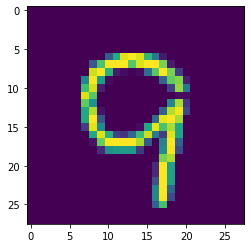

In [4]:
images.shape
plt.imshow(data[0][63].view(28,28))
data[1][63]

In [5]:
images.shape

torch.Size([64, 1, 28, 28])

In [6]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), # (BS,784) --> (BS,128)
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12), 
            nn.ReLU(),
            nn.Linear(12, 3)     #output BS x 3   
        )
        
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), 
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128), 
            nn.ReLU(),
            nn.Linear(128, 28*28),     #output BS x 784   
            nn.Tanh()
        )
        
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [7]:
lr = 0.003
weight_decay = 0.00005
AE = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(AE.parameters(), lr = lr) #w/o weight_decay

In [8]:
#def save_ae_image(image, path):
    #save_image(image, path)

  0%|          | 0/938 [00:00<?, ?it/s]D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\torch\autograd\__init__.py:147: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:115.)
  Variable._execution_engine.run_backward(
100%|██████████| 938/938 [00:14<00:00, 62.56it/s]


Epoch 0 of 15
loss: 0.1342


100%|██████████| 938/938 [00:15<00:00, 60.12it/s]


Epoch 1 of 15
loss: 0.1565


100%|██████████| 938/938 [00:15<00:00, 59.17it/s]


Epoch 2 of 15
loss: 0.1449


100%|██████████| 938/938 [00:16<00:00, 58.24it/s]


Epoch 3 of 15
loss: 0.1380


100%|██████████| 938/938 [00:16<00:00, 58.61it/s]


Epoch 4 of 15
loss: 0.1216


100%|██████████| 938/938 [00:16<00:00, 58.26it/s]


Epoch 5 of 15
loss: 0.1244


100%|██████████| 938/938 [00:16<00:00, 58.09it/s]


Epoch 6 of 15
loss: 0.1220


100%|██████████| 938/938 [00:16<00:00, 57.72it/s]


Epoch 7 of 15
loss: 0.1436


100%|██████████| 938/938 [00:16<00:00, 57.81it/s]


Epoch 8 of 15
loss: 0.1205


100%|██████████| 938/938 [00:15<00:00, 59.48it/s]


Epoch 9 of 15
loss: 0.1276


100%|██████████| 938/938 [00:16<00:00, 56.96it/s]


Epoch 10 of 15
loss: 0.1200


100%|██████████| 938/938 [00:18<00:00, 50.41it/s]


Epoch 11 of 15
loss: 0.1184


100%|██████████| 938/938 [00:16<00:00, 55.59it/s]


Epoch 12 of 15
loss: 0.1227


100%|██████████| 938/938 [00:17<00:00, 54.28it/s]


Epoch 13 of 15
loss: 0.1284


100%|██████████| 938/938 [00:16<00:00, 55.22it/s]


Epoch 14 of 15
loss: 0.1300


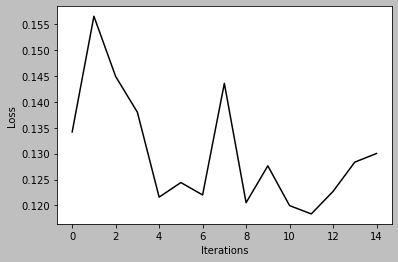

In [9]:
epochs = 15
outputs = []
img = []
ae_loss = []
for epoch in range(epochs):
    for (image,_) in tqdm(mnist_data_loader):
        image = image.view(-1, 28*28)
        reconstructed = AE(image)
        loss = criterion(reconstructed, image)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #print(f'epoch:{epoch+1}, loss:{loss.item():.4f}')
    print(f"Epoch {epoch} of {epochs}")
    print(f"loss: {loss.item():.4f}")
    outputs.append((epoch, image, reconstructed))
    ae_loss.append(loss)     
                          
                          
                          
    #ae_img = AE(image).detach()
    #ae_img = make_grid(generated_img)
    #save_ae_image(ae_img, f"{epoch}.png")
    #img.append(ae_img)
    
    
plt.style.use('grayscale')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.plot(ae_loss)


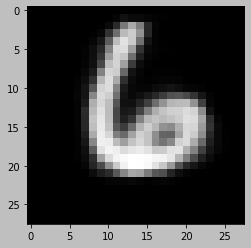

In [10]:
#plotting the corresponding original image
for i, item in enumerate(image):  
  item = item.view(-1, 28, 28).detach()
  plt.imshow(item[0])

#plotting the image generated by the AE
for i, item in enumerate(reconstructed):
  item = item.view(-1, 28, 28).detach()
  plt.imshow(item[0])

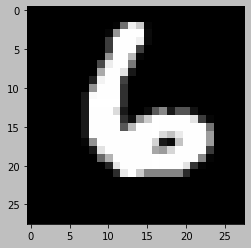

In [11]:
#plotting the corresponding original image
for i, item in enumerate(image):  
  item = item.view(-1, 28, 28).detach()
  plt.imshow(item[0])


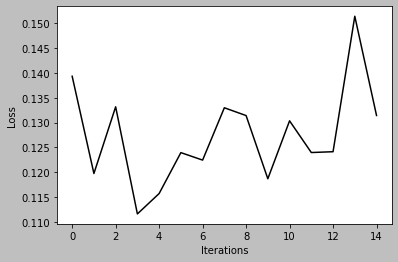

In [86]:
plt.style.use('grayscale')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.plot(ae_loss)